In [1]:
#!python -m pip install pandas
#!python -m pip install seaborn
#!python -m pip install matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = sns.load_dataset('titanic_v2.csv')
df = pd.read_csv('titanic_v2.csv')
df

,pclass,sex,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1304,3,female,14.5000,0
1305,3,female,0.0000,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


In [2]:
df.dtypes


pclass        int64
sex          object
age         float64
survived      int64
dtype: object

In [3]:
df['sex'] = df['sex'].map({'male': 1, 'female': 2})

In [4]:
df.describe()

,pclass,sex,age,survived
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,1.355997,23.877515,0.381971
std,0.837836,0.478997,17.590848,0.486055
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,7.000000,0.000000
50%,3.000000,1.000000,24.000000,0.000000
75%,3.000000,2.000000,35.000000,1.000000
max,3.000000,2.000000,80.000000,1.000000


In [5]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [6]:
korrelaatiomatriisi = df.loc[:,'age':'survived'].corr()


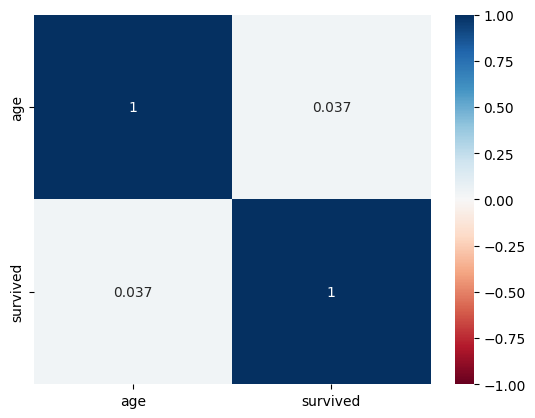

In [7]:
sns.heatmap(korrelaatiomatriisi, vmin = -1.0, vmax = 1.0, cmap = 'RdBu', annot = True)
plt.show()

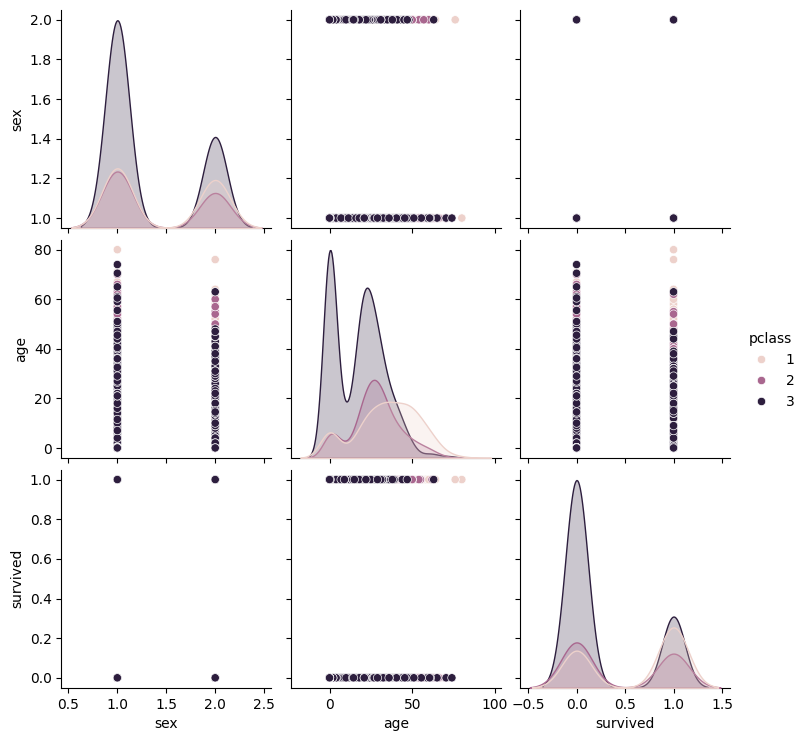

In [8]:
sns.pairplot(df, hue = 'pclass')
plt.show()

3) Datan Valmistelu

In [9]:
colnames = df.columns
colnames

Index(['pclass', 'sex', 'age', 'survived'], dtype='object')

In [10]:
X = df.loc[:, 'pclass':'age']
# eotetaan vastemuuttuja talteen series-olioon
y = df.loc[:, 'survived']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train , y_test = train_test_split(X, y, 
   test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1047, 3)
(262, 3)


In [12]:
'''from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth = 3)
classifier.fit(X, y)'''

# päätöspuuluokitteluja
classifier = tree.DecisionTreeClassifier(max_depth=2)
#sovitetaan muuttujat malliin
classifier.fit(X_train,y_train)

NameError: name 'tree' is not defined

In [ ]:
print(tree.export_text(classifier, feature_names=list(colnames[:3])))

In [ ]:
tree.plot_tree(classifier,
               max_depth=3, 
               feature_names=colnames[:3], 
               class_names=['not_survived', 'survived'], 
               label='all', 
               filled=True, 
               impurity=True, 
               node_ids=True, 
               proportion=True, 
               rounded=True, 
               precision=3, 
               ax=None, 
               fontsize=None)
plt.show()


5) Arviointi

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#ennuste selittävien muuttujien perusteella
#oikeasti pitäisi tehdä testijoukosta. Tässä sitä ei ole käytetty, koska tietojoukko on niin pieni.
Y_pred = classifier.predict(X_test)

# sekaannusmatriisi
cm = confusion_matrix(y_test, Y_pred)
print("Confusion matrix:\n",cm)

#tarkkuus 
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy calculated from the training set = %.3f" % (accuracy)) 

#luokitteluraportti
print(classification_report(y_test, Y_pred, target_names=['not_survived','survived']))
'''


Y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
print("Confusion matrix:\n",cm)
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy calculated from the training set = %.3f (SUBJECT TO OVERFITTING)" % (accuracy))
print(classification_report(y_test, Y_pred, target_names=['no', 'yes']))'''

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, Y_pred)  #normalize='all'
cmd = ConfusionMatrixDisplay(cm, display_labels=['not_survived','survived'])
cmd.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# osien määrä, jaetaan k yhtä suureen osaan
k = 2

#arvioinnin tulos kierroksittain
#kullakin kierroksella lasketaan k-1 osaa mallien opettamiseen, 1 osa mallin testaamiseen
#toistetaan k kertaa, lopuksi otetaan kaikkien k-tulosten keskiarvo
scores = cross_val_score(estimator = classifier,
                         X = X_test,
                         y = y_test,
                         scoring = "accuracy",
                         cv = k)

print("Accuracies from %d individual folds:" % k)
print('scores', scores)

# kierrosten keskiarvo
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Ristiinvalidointi

In [ ]:
from sklearn.model_selection import cross_val_score

k = 2
scores = cross_val_score(estimator = classifier,
                         X = X,
                         y = y,
                        scoring = 'accuracy',
                        cv = k)

print(k)
print(scores)
print(scores.mean())